# Exploratory Data Analysis of Credit Default Data

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
credit = pd.read_csv("clients.csv", header = 1, dtype={'SEX': 'category',
                                           'EDUCATION': 'category',
                                           'MARRIAGE': 'category',
                                           'PAY_0': 'category',
                                           'PAY_2': 'category',
                                           'PAY_3': 'category',
                                           'PAY_4': 'category',
                                           'PAY_5': 'category',
                                           'PAY_6': 'category', 
                                           'default payment next month': 'category'})

In [4]:
credit.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
credit.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int

In [7]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
#Count by Sex
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

In [9]:
#Count by Education
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

In [10]:
#Count by Marriage Status
credit.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

In [11]:
#Count by default
credit.groupby('default payment next month')['default payment next month'].count()

default payment next month
0    23364
1     6636
Name: default payment next month, dtype: int64

In [12]:
#Change name of last column
credit.rename(columns={'default payment next month':'DEFAULT'}, inplace=True)

In [13]:
credit.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [14]:
#Remove ID column
credit = credit.iloc[:,1:]
credit.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


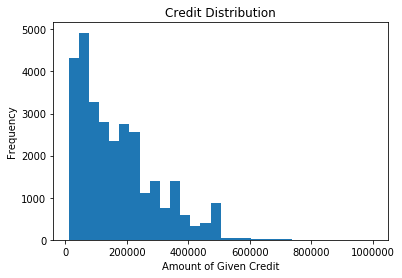

In [15]:
#Limit Balance Distribution
plt.hist(credit['LIMIT_BAL'], bins=30)
plt.xlabel('Amount of Given Credit')
plt.ylabel('Frequency')
plt.title('Credit Distribution')
plt.show()

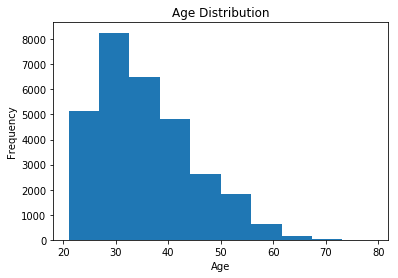

In [16]:
#Age Distribution
plt.hist(credit['AGE'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [17]:
#Age and Credit Balance Scatterplot

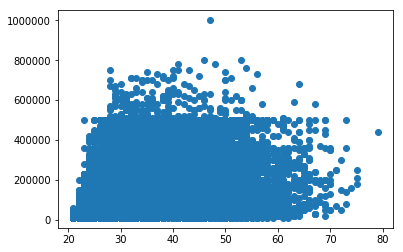

In [18]:
plt.scatter(credit['AGE'], credit['LIMIT_BAL'])
plt.show()

In [19]:
#subset for default
Default = credit[credit['DEFAULT']=='1']
Default.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [20]:
len(Default)

6636

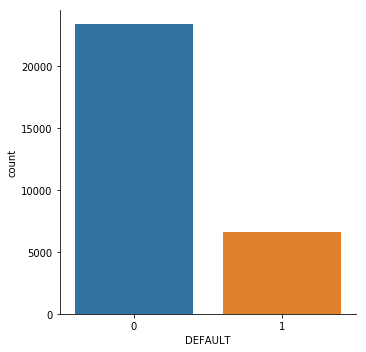

In [21]:
#Default status
sns.catplot('DEFAULT', data=credit, kind='count')

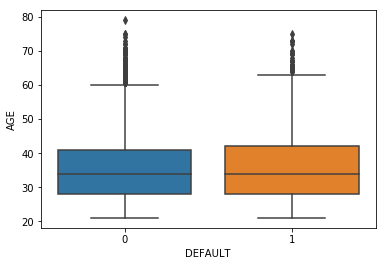

In [22]:
#Age and Default Boxplot
sns.boxplot(x="DEFAULT", y="AGE", data=credit)

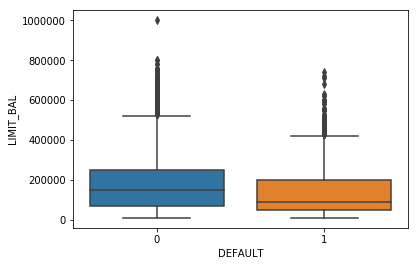

In [23]:
#Credit Balance and Scatterplot
Balance_default_boxplot = sns.boxplot(x="DEFAULT", y="LIMIT_BAL", data=credit)

In [24]:
#Sex counts
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

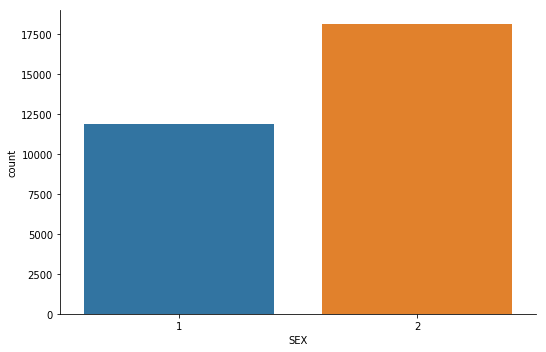

In [25]:
#Sex count plot
sns.catplot('SEX', data=credit, kind='count', aspect=1.5)

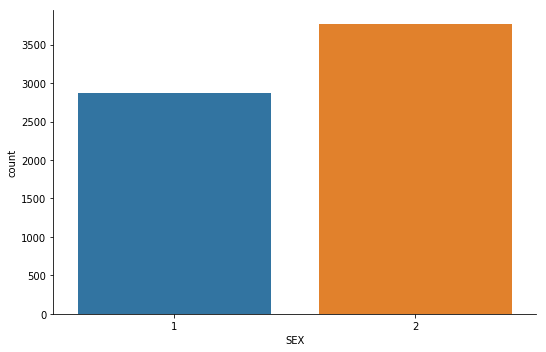

In [26]:
#Sec count by those who defaulted
sns.catplot('SEX', data=Default, kind='count', aspect=1.5)

In [27]:
#Add Bill Change 
credit['BILL_CHANGE'] = (credit['BILL_AMT1'] / credit['BILL_AMT6'].shift(1) - 1).fillna(0)
credit.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,BILL_CHANGE
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,0.000000
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,inf
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,7.966268
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,2.022059
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,-0.708363
5,50000,1,1,2,37,0,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,2.366264
6,500000,1,1,2,29,0,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,17.376199
7,100000,2,2,2,23,0,-1,-1,0,0,...,-159,567,380,601,0,581,1687,1542,0,-0.974942
8,140000,2,3,1,28,0,0,2,0,0,...,11793,3719,3329,0,432,1000,1000,1000,0,18.902998
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,13007,13912,0,0,0,13007,1122,0,0,-1.000000


In [28]:
#create bill change category
def func(credit):
    if credit['BILL_CHANGE'] > 0:
        return 'Increase'
    elif credit['BILL_CHANGE'] < 0:
        return 'Decrease' 
    else:
        return 'No change'

credit['BILL_CHANGE_CAT'] = credit.apply(func, axis=1)

credit.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,BILL_CHANGE,BILL_CHANGE_CAT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,0.000000,No change
1,120000,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,inf,Increase
2,90000,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,7.966268,Increase
3,50000,2,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,2.022059,Increase
4,50000,1,2,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,-0.708363,Decrease


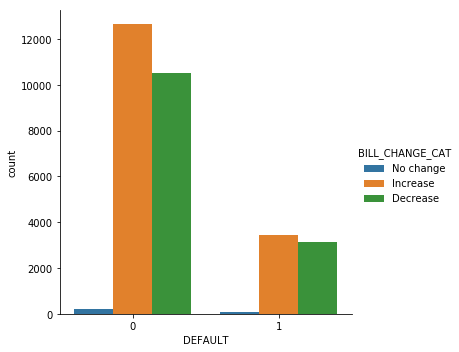

In [29]:
sns.catplot(x='DEFAULT', data=credit, kind='count', hue='BILL_CHANGE_CAT')

In [30]:
#Education 
credit.groupby('EDUCATION')['EDUCATION'].count()


EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

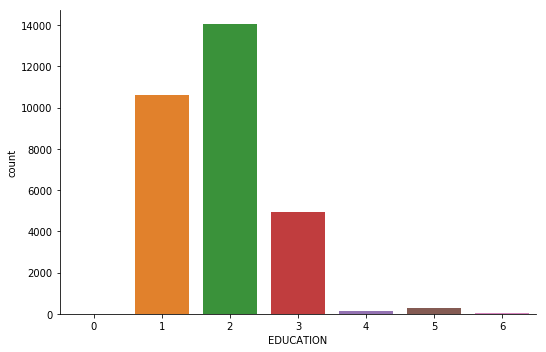

In [31]:
#Education table
sns.catplot('EDUCATION', data=credit, kind='count', aspect=1.5)

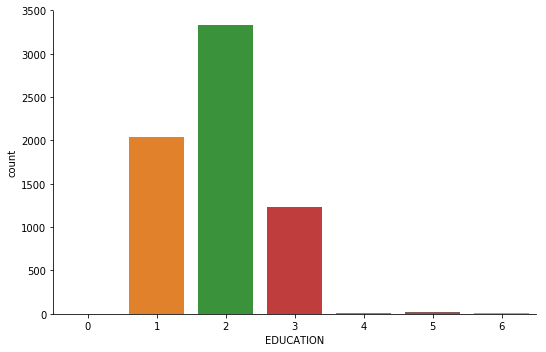

In [32]:
#Education of those who defaulted
sns.catplot('EDUCATION', data=Default, kind='count', aspect=1.5)

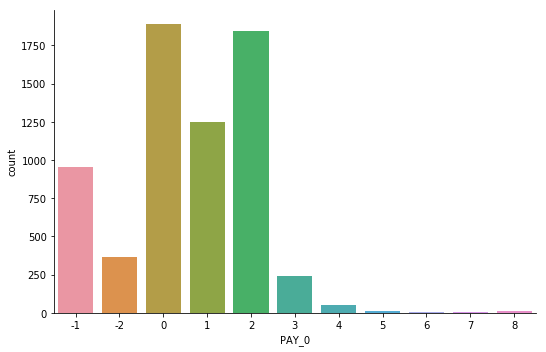

In [33]:
# History of Past Statement for September 2005 for those who defaulted
sns.catplot('PAY_0', data=Default, kind='count', aspect=1.5)

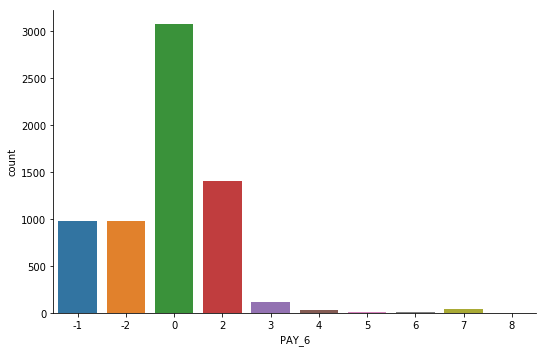

In [34]:
# History of Past Statement for April 2005 for those who defaulted
sns.catplot('PAY_6', data=Default, kind='count', aspect=1.5)

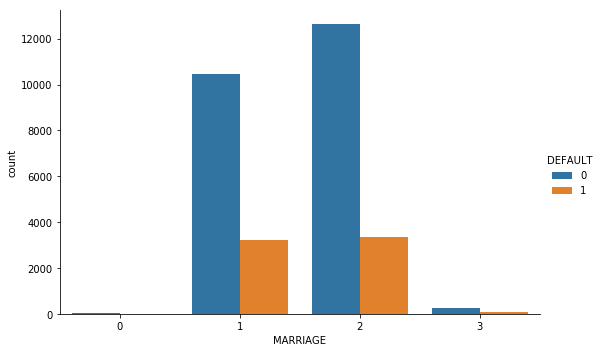

In [35]:
#Marriage status and default
sns.catplot('MARRIAGE', data=credit, kind='count', hue='DEFAULT', aspect=1.5)

In [42]:
#correlation plot
credit2 = pd.read_csv("clients.csv", header = 1)
credit_no_id = credit2.iloc[:, 1:25]

corrMat = credit_no_id.corr()
print(corrMat)


                            LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.219161 -0.108139   
SEX                          0.024755  1.000000   0.014232 -0.031389   
EDUCATION                   -0.219161  0.014232   1.000000 -0.143464   
MARRIAGE                    -0.108139 -0.031389  -0.143464  1.000000   
AGE                          0.144713 -0.090874   0.175061 -0.414170   
PAY_0                       -0.271214 -0.057643   0.105364  0.019917   
PAY_2                       -0.296382 -0.070771   0.121566  0.024199   
PAY_3                       -0.286123 -0.066096   0.114025  0.032688   
PAY_4                       -0.267460 -0.060173   0.108793  0.033122   
PAY_5                       -0.249411 -0.055064   0.097520  0.035629   
PAY_6                       -0.235195 -0.044008   0.082316  0.034345   
BILL_AMT1                    0.285430 -0.033642   0.023581 -0.023472   
BILL_AMT2                    0.278314 -0.031183   0.018749 -0.02

In [43]:
#covariance plot
covMat = credit_no_id.cov()
print(covMat)

                               LIMIT_BAL          SEX     EDUCATION  \
LIMIT_BAL                   1.683446e+10  1571.050630 -22474.028945   
SEX                         1.571051e+03     0.239247      0.005502   
EDUCATION                  -2.247403e+04     0.005502      0.624651   
MARRIAGE                   -7.323670e+03    -0.008014     -0.059184   
AGE                         1.730767e+05    -0.409726      1.275380   
PAY_0                      -3.954593e+04    -0.031685      0.093584   
PAY_2                      -4.603765e+04    -0.041442      0.115025   
PAY_3                      -4.443225e+04    -0.038694      0.107861   
PAY_4                      -4.057181e+04    -0.034411      0.100528   
PAY_5                      -3.667056e+04    -0.030521      0.087340   
PAY_6                      -3.509308e+04    -0.024754      0.074816   
BILL_AMT1                   2.727020e+09 -1211.694332   1372.377644   
BILL_AMT2                   2.570130e+09 -1085.595467   1054.657595   
BILL_A